# Librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Pregunta 1
 Si tengo dos segmentos con un mismo origen. ¿Uno gira respecto del otro en sentido anti-horario o horario?

In [48]:
def pregunta1(P0,P1,P2):
    
    d = ((P1[0]-P0[0])*(P2[1]-P0[1]))-((P2[0]-P0[0])*(P1[1]-P0[1]))
    if d>0:
        print(" P1 Esta girado en sentido horario respecto a P2")
    elif d == 0:
        print(" P1 Esta paralelo a P2")
    else:
        print("P1 Esta girando en sentido antihorario respecto a P2")
    # Grafica
    plt.plot(P0[0],P0[1],"ro") #Con origen en P0
    # Punto P1 Graficar (p1-p0)
    plt.annotate("",xy = (P1[0],P1[1]), xytext = (P0[0],P0[1]), arrowprops = dict(arrowstyle = "->", color = "blue"))
    plt.annotate("P1",xy = (P1[0],P1[1]), xytext = (P1[0]+0.01,P1[1]))
    #Punto P2 Graficar (p2-p0)
    plt.annotate("",xy = (P2[0],P2[1]), xytext = (P0[0],P0[1]), arrowprops = dict(arrowstyle = "->", color = "green"))
    plt.annotate("P2",xy = (P2[0],P2[1]), xytext = (P2[0]+0.01,P2[1]))
    #Limites en X y Y
    plt.ylim(min(0,P0[1],P1[1],P2[1])-0.1,max(0,P0[1],P1[1],P2[1])+0.25)
    plt.xlim(min(0,P0[0],P1[0],P2[0])-0.1,max(0,P0[0],P1[0],P2[0])+0.25)
    plt.show()
        
    

 P1 Esta girado en sentido horario respecto a P2


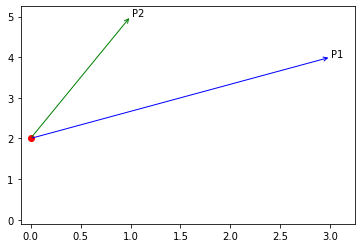

In [49]:
P0 = [0,2]
P1 = [3,4]
P2 = [1,5]
pregunta1(P0,P1,P2)

### Definiremos la siguiente función como el producto cruz bidimensional.
Esta Función nos ayudara más adelante a ver la orientación en los segmentos y poder realizar las siguientes preguntas.

In [2]:
def Producto_Cruz(P0,P1,P2):
    d = ((P1[0]-P0[0])*(P2[1]-P0[1]))-((P2[0]-P0[0])*(P1[1]-P0[1]))
    return d

# Pregunta 2

¿El segmento P1P2 esta girado en sentido horario respecto a P0P1?, es decir que ¿Al avanzar desde P0 a P2, gira a la izquierda o a la derecha de p1?


In [53]:
def pregunta2(P0,P1,P2):
    d = Producto_Cruz(P0,P1,P2)
    if d>0:
        print("P2 se hace un giro en sentido antihoraro de P1")
    elif d==0:
        print("P2 sigue sin girar")
    else:
        print("P2 esta girando en sentido horario de P1")
    # Grafica
    plt.plot(P0[0],P0[1],"ro") #Con origen en P0
    # Punto P1 Graficar (p1-p0)
    plt.annotate("",xy = (P1[0],P1[1]), xytext = (P0[0],P0[1]), arrowprops = dict(arrowstyle = "->", color = "blue"))
    plt.annotate("P1",xy = (P1[0],P1[1]), xytext = (P1[0]+0.01,P1[1]))
    #Punto P2 Graficar (p2-p0)
    plt.annotate("",xy = (P2[0],P2[1]), xytext = (P1[0],P1[1]), arrowprops = dict(arrowstyle = "->", color = "green"))
    plt.annotate("P2",xy = (P2[0],P2[1]), xytext = (P2[0]+0.01,P2[1]))
    #Limites en X y Y
    plt.ylim(min(P0[1],P1[1],P2[1])-0.1,max(P0[1],P1[1],P2[1])+0.25)
    plt.xlim(min(P0[0],P1[0],P2[0])-0.1,max(P0[0],P1[0],P2[0])+0.25)
    plt.show()
    

P2 se hace un giro en sentido antihoraro de P1


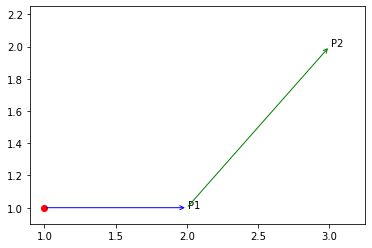

In [54]:
P0 = [1,1]
P1 = [2,1]
P2 = [3,2]
pregunta2(P0,P1,P2)

# Pregunta 3
Dados dos segmentes evaluar si se cruzan o no?

In [14]:
def puntos_corte(P1,P2,P3,P4):
    # Entra c el cual es un booleano que nos dice si se cruzaron los segmentos o no se cruzaron
    #Entra d que es el determinante 
    Pc = [] #Lista vacia, donde vamos a agregar los puntos donde se cruzan.  
    beta = 0 #Parametro 1
    Alpha = 0 #Parametro 2
    det1 = (P3[0]-P4[0])*(P2[1]-P1[1]) 
    det2 = (P2[0]-P1[0])*(P3[1]-P4[1])
    if det1 != det2:
        beta = (1/(det1-det2))*(((P2[1]-P1[1])*(P2[0]-P4[0]))+((P1[0]-P2[0])*(P2[1]-P4[1])))
        alpha = (1/(det1-det2))*(((P4[1]-P3[1])*(P2[0]-P4[0]))+((P3[0]-P4[0])*(P2[1]-P4[1])))
        Pc1 = alpha*P1[0]+(1-alpha)*P2[0]
        Pc2 = beta*P1[1]+(1-beta)*P2[1]
        Pc = [Pc1,Pc2]
        print(Pc1)
    else:
        print("Son segmentos paralelos no tendrían puntos de corte")
    
    return Pc
    
    

In [15]:
def pregunta3(P1,P2,P3, P4):
    # Recordatorio dk hace referencia a que el pk es el origen que va para pi y pj
    d1 = Producto_Cruz(P1,P4,P3)
    d2 = Producto_Cruz(P2,P4,P3)
    d3 = Producto_Cruz(P3,P2,P1)
    d4 = Producto_Cruz(P4,P2,P1)
    # Asignar una variable True o False para ver si se cruzan o no.
    c = False
    
    # Condiciones para saber si se cruzan o no los segmentos
    if (d1*d2)<0 and (d4*d3)<0:
        c = True
        print("Los dos segmentos SE CRUZAN")
    elif (d1*d2)>0 and (d3*d4)>0:
        c = False
        print("Los dos segmentos NO SE CRUZAN")
    elif (d1*d2)<=0 and d4==0:
        if (min(P1[0],P2[0])<=P4[0]<=max(P1[0],P2[0]))and (min(P1[1],P2[1])<=P4[1]<=max(P1[1],P2[1])):
            c = True
            print("Los dos segmentos SE CRUZAN")
        else:
            c = False
            print("Los dos segmentos NO SE CRUZAN")
    elif (d1*d2)<=0 and d3==0:
        if (min(P1[0],P2[0])<=P3[0]<=max(P1[0],P2[0]))and (min(P1[1],P2[1])<=P3[1]<=max(P1[1],P2[1])):
            c = True
            print("Los dos segmentos SE CRUZAN")
        else:
            c = False
            print("Los dos segmentos NO SE CRUZAN")
    elif (d4*d3)<=0 and d2==0:
        if (min(P3[0],P4[0])<=P2[0]<=max(P4[0],P3[0]))and (min(P4[1],P3[1])<=P2[1]<=max(P4[1],P3[1])):
            c = True
            print("Los dos segmentos SE CRUZAN")
        else:
            c = False
            print("Los dos segmentos NO SE CRUZAN")
    elif (d4*d3)<=0 and d1==0:
        if (min(P3[0],P4[0])<=P1[0]<=max(P3[0],P4[0]))and (min(P3[1],P4[1])<=P2[1]<=max(P3[1],P4[1])):
            c = True
            print("Los dos segmentos SE CRUZAN")
        else:
            c = False
            print("Los dos segmentos NO SE CRUZAN")
    
    elif (d1*d2)>0 and d4==0:
        c = False
        print("Los dos segmentos NO SE CRUZAN")
    elif (d3*d4)>0:
        c = False
        print("Los dos segmentos NO SE CRUZAN")
    else:
        print("No esta el caso")
    
    #Evalua puntos de corte
    if c == True:
        Pc = puntos_corte(P1,P2,P3,P4)
        print(Pc)
    else:
        Pc = 0
        
    # Graficar los segmentos
    P1x,P1y = [P1[0],P2[0]],[P1[1],P2[1]] 
    P2x,P2y = [P3[0],P4[0]],[P3[1],P4[1]] 
    
    plt.clf()
    plt.plot(P1[0],P1[1],"ro")
    plt.plot(P2[0],P2[1],"ro")
    plt.plot(P3[0],P3[1],"ro")
    plt.plot(P4[0],P4[1],"ro")
    plt.plot(P1x,P1y)
    plt.plot(P2x,P2y)
    plt.annotate("P1", (P1[0],P1[1]),(P1[0] + 0.01, P1[1]))
    plt.annotate("P2", (P2[0],P2[1]),(P2[0] + 0.01, P2[1]))
    plt.annotate("P3", (P3[0],P3[1]),(P3[0] + 0.01, P3[1]))
    plt.annotate("P4", (P4[0],P4[1]),(P4[0] + 0.01, P4[1]))
    plt.show()
        
        

Los dos segmentos SE CRUZAN
2.5
[2.5, 2.5]


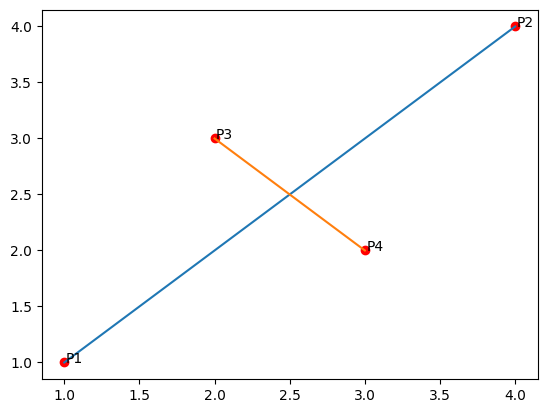

In [16]:
P1=[1,1] 
P2=[4,4]
P3=[2,3]
P4=[3,2]
pregunta3(P1,P2,P3,P4)